In [262]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.context('seaborn-white')

# color declarations

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#e4d411"
dark="#F3E335"
dark_highlight="#C0B002"
green="#00FF00"
light_grey="#DDDDDD"


In [236]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [236]:
states_dict2 = {state: abbrev for abbrev, state in states_dict.items()}

def count_unique_index(df, by, asc=False):
    """ Count combinations of column values
    df - dataframe to be processed
    by - list of columns to be checked
    asc - is sorted list should be ascending (default false) 
    
    Returns - dataframe of column combinations and their counts 
    """
    return df.groupby(by).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=asc)

Signature: count_unique_index(df, by, asc=False)
Docstring:
Count combinations of column values
df - dataframe to be processed
by - list of columns to be checked
asc - is sorted list should be ascending (default false) 

Returns - dataframe of column combinations and their counts 
File:      ~/GitHub/lectures/Data anlaytics/Single parameters models/Kidney cancer/<ipython-input-236-fabec5cf7b40>
Type:      function


In [245]:
df_1=pd.read_table('cntypop.txt')

In [248]:
counties=df_1.loc[:,'countyNm':' totPop'] # limit to first 3 columns
counties.countyNm=counties.countyNm.str.capitalize().str.rstrip() # capitalize and remove trailing spaces
counties['population']=counties.groupby(['countyNm', ' stateAb'])[' totPop'].transform(sum) #sum repearted instances of county-state
counties=(counties.drop_duplicates(subset=['countyNm', ' stateAb']) # drop transformed duplicates
                 .drop([' totPop'],axis='columns') # drop old population
                 .reset_index(drop=True) # reset index
                 [['countyNm', ' stateAb','population']])# reorder columns
counties.columns=['county','state','population'] #rename columns


In [252]:
df_2=pd.read_table('gd80to84.txt')
df_2_tr=df_2.iloc[:,:-4]
df_2_tr.columns=['state',  'county',  'dc', 'dcV', 'pop','popV', 'aadc', 'aadcV',  'dcC', 'dcCV','good']
df_3=pd.read_table('gd85to89.txt')


In [253]:
death_counts_decade=df_3.iloc[:,0:3] # limit to first 3 columns
death_counts_decade=death_counts_decade.dropna() #remove empty rows
death_counts_decade.dc=death_counts_decade.dc+df_2_tr.dc # sum death counts for both 5 years
death_counts_decade.county=death_counts_decade.county.str.capitalize() # capitalize
death_counts_decade.state=death_counts_decade.state.str.capitalize().map(states_dict2) #mapr state name to abbreviation


In [255]:
# merging population and death data
counties_dc=counties.merge(death_counts_decade,on=['state','county'],how='left')[['county', 'state','population', 'dc']]
counties_dc.dc=counties_dc.dc.fillna(0) # missing county-state combinations filled with 0's
counties_dc['obs_dr']=counties_dc.dc/10/counties_dc.population*1e5 # new column of empirical decade death rate per 100K people


In [256]:
counties_dc.head()

,county,state,population,dc,obs_dr
0,Autauga,AL,34222,3.0,0.876629
1,Baldwin,AL,98280,22.0,2.238502
2,Barbour,AL,25417,1.0,0.393437
3,Bibb,AL,16576,1.0,0.603282
4,Blount,AL,39248,8.0,2.038320


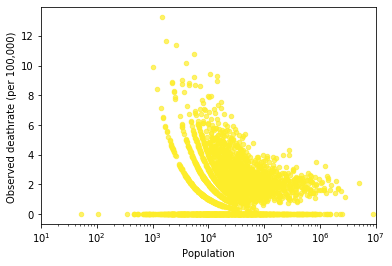

In [283]:

ax=counties_dc.plot.scatter(x='population',
                         y='obs_dr',
                         logx=True,
                         color=mid,
                         alpha=0.7,
                         xlim=(1e1,1e7)
                        )
plt.xlabel('Population')
plt.ylabel('Observed deathrate (per 100,000) ')
plt.show()

In [284]:
counties_dc.to_csv('counties_dc.csv')